In [ ]:
#!pip install -e /workspace/volume/pyReefCore

# Idealised case of shallowing-up fossil reef sequence

**pyReef-Core** is a deterministic, one-dimensional (1-D) numerical model, that simulates the vertical coralgal growth patterns observed in a drill core, as well as the physical, environmental processes that effect coralgal growth. 
<br/>
<br/>
<div align="center">
    <img width=900 src="https://rawgit.com/pyReef-model/pyReefCore/master/mfigs/fig1.jpg" alt="Schematic view" title="Schematic view"</img>
</div>

_Schematic figure of a hypothetical reef with transitions from shallow to deep assemblages occurring down-core, illustrating growth-form responses of corals to environmental forcing including light, sea level changes (**sl**), uplift and subsidence (**u/s**), hydrodynamic energy (**w** wave conditions and **c** currents), nutrients input **nu**, ocean temperature (**T**) and acidity (**pH**), karstification (**k**) and sediment flux._

The model is capable of integrating ecological processes like coralgal community interactions over centennial-to-millennial scales using predator-prey or Generalised Lotka-Volterra Equations.

Source code is available from [GitHub website](https://github.com/pyReef-model/pyReefCore)


<div class="alert alert-block alert-info">
Using **pyReef-Core**, we quantitatively test carbonate platform development under the influence of ecological and environmental processes, and interpret vertical growth and karstification patterns observed in drill cores.</div>

***

**Content:**
- [Input file & loading experiment](#input)
- [Model simulation](#run)
- [Model results](#results)
- [Analysing model results](#analyse)

***

Loading required modules for this exercise

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cmo

%config InlineBackend.figure_format = 'svg'

from pyReefCore.model import Model

## <a name="input"></a>  Input file & loading experiment

Once the library has been loaded, the model initialisation is done using the following command:

In [2]:
# Initialise model
reef = Model()

The next step consists in defining the initial conditions for our simulation. This is done by using an **XmL** input file which set the parameters to be used, such as:

- the initial community population number $X0$
- the intrinsic rate of a population species $\epsilon$
- the interaction coefficients among the species association $\alpha$

For a complete list of model input parameters follow the guide provided [here](https://github.com/pyReef-model/pyReefCore#-input-file-structure).

In [3]:
# Define the XmL input file
reef.load_xml('input-ex6.xml')

Visualise the initial conditions of your simulation can be done using the following command:

Community matrix aij representing the interactions between communities:

         a0      a1      a2
a0j -0.0005 -0.0001  0.0000
a1j -0.0001 -0.0005 -0.0001
a2j  0.0000 -0.0001 -0.0005

Communities maximum production rates [m/y]:

               Prod.
shallow        0.011
moderate deep  0.012
deep           0.009

Environmental trapezoidal shape functions:


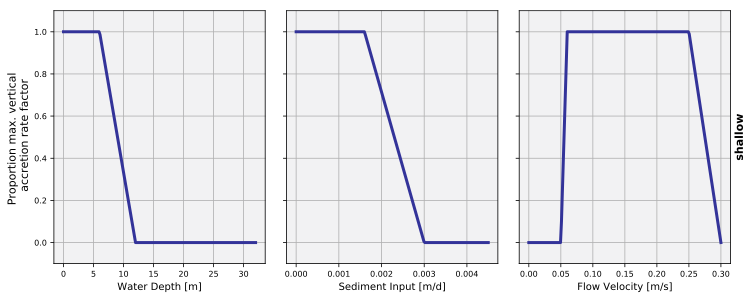

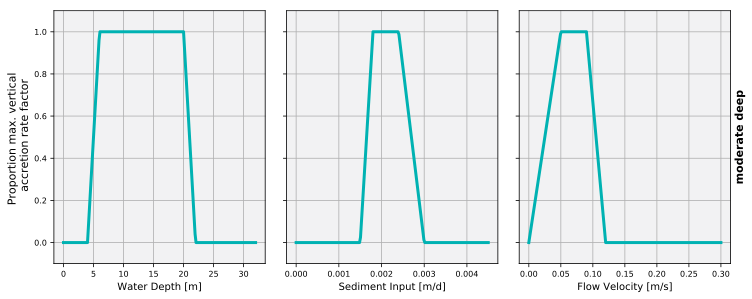

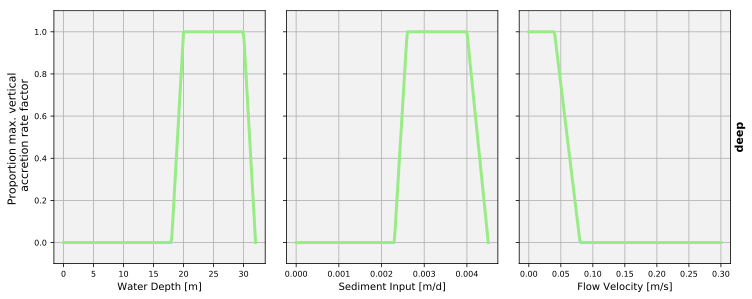

In [4]:
reef.core.initialSetting(size=(10,4), fname='input',dpi=400)

## <a name="run"></a>  Model simulation

The core of the code consist in solving the system of ODEs from the **GLV** equations using the **RKF** method.

Once a community association population is resolved, carbonate production is calculated using a carbonate production factor. Production factors are specified for the maximum population, and linearly scaled to the actual population.

To run the model for a given time period [years], the following function needs to be called:

In [5]:
reef.run_to_time(-1500,showtime=500.,verbose=False)

tNow = -8500.0 [yr]
tNow = -8000.0 [yr]
tNow = -7500.0 [yr]
tNow = -7000.0 [yr]
tNow = -6500.0 [yr]
tNow = -6000.0 [yr]
tNow = -5500.0 [yr]
tNow = -5000.0 [yr]
tNow = -4500.0 [yr]
tNow = -4000.0 [yr]
tNow = -3500.0 [yr]
tNow = -3000.0 [yr]
tNow = -2500.0 [yr]
tNow = -2000.0 [yr]
tNow = -1500.0 [yr]


## <a name="results"></a>  Model results

All the output from the model run can be plotted on the notebook using a series of internal functions presented below.

First one can specify a colormap to use for the plot using one of the matplotlib predefined colormap proposed here: 
- [colormaps_reference](http://matplotlib.org/examples/color/colormaps_reference.html)

In [6]:
from matplotlib.cm import terrain, plasma

nbcolors = len(reef.core.coralH)+10
#colors = cmo.cm.dense(np.linspace(0, 4, nbcolors))
colors = terrain(np.linspace(0, 1, nbcolors))

nbcolors = len(reef.core.layTime)+3
colors2 = cmo.cm.haline_r(np.linspace(0, 1, nbcolors))

### Communities population evolution

- with time: `reef.plot.communityTime`
- with depth: `reef.plot.communityDepth`

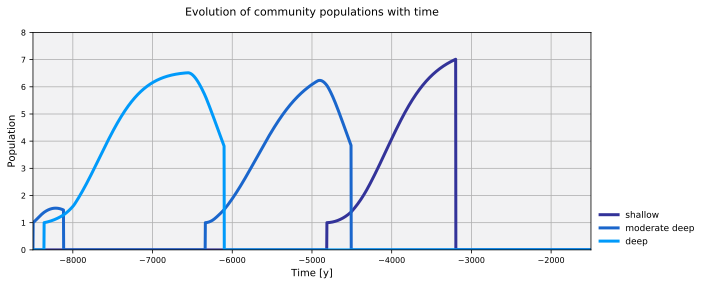

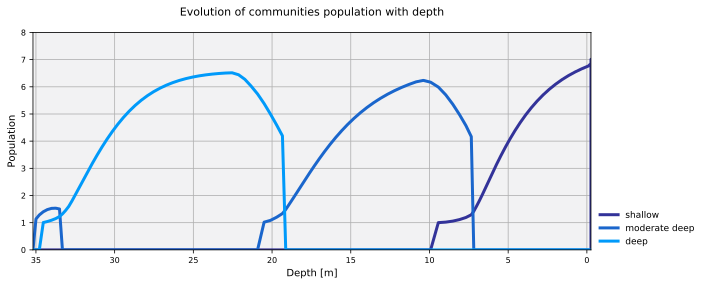

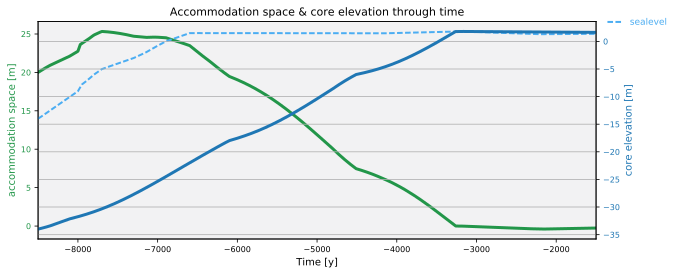

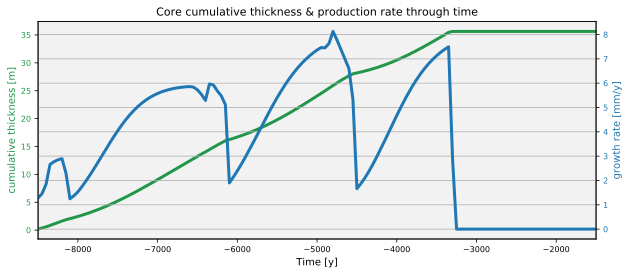

In [7]:
reef.plot.communityTime(colors=colors, size=(10,4), font=8, dpi=100,fname='apop_t.pdf')
reef.plot.communityDepth(colors=colors, size=(10,4), font=8, dpi=100, fname ='apop_d.pdf')
reef.plot.accommodationTime(size=(10,4), font=8, dpi=100, fname ='acc_t.pdf')

### Coral synthetic core

The main output of the model consists in the synthetic core which shows the evolution of the coral stratigraphic architecture obtained from the interactions among species and with their environment. The plot is obtained using the following function: 
- `reef.plot.drawCore`

The user has the option to save: 
- the figure using the `figname` parameter (`figname` could either have a _.png_ or _.pdf_ extension)
- the model output as a _CSV_ file using the `filename` parameter. This will dump all output dataset for further analysis if required.

In [ ]:
#help(reef.plot.drawCore)

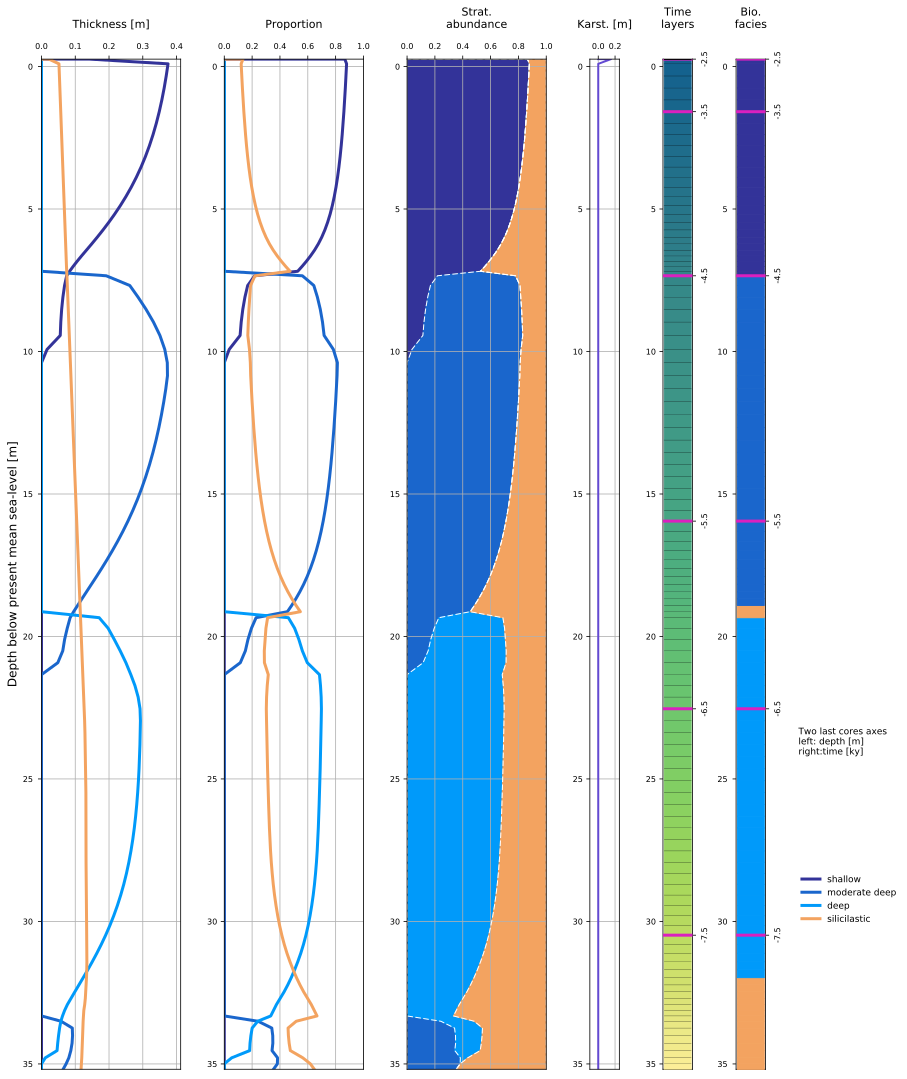

Figure has been saved in output-ex6_2/core.pdf


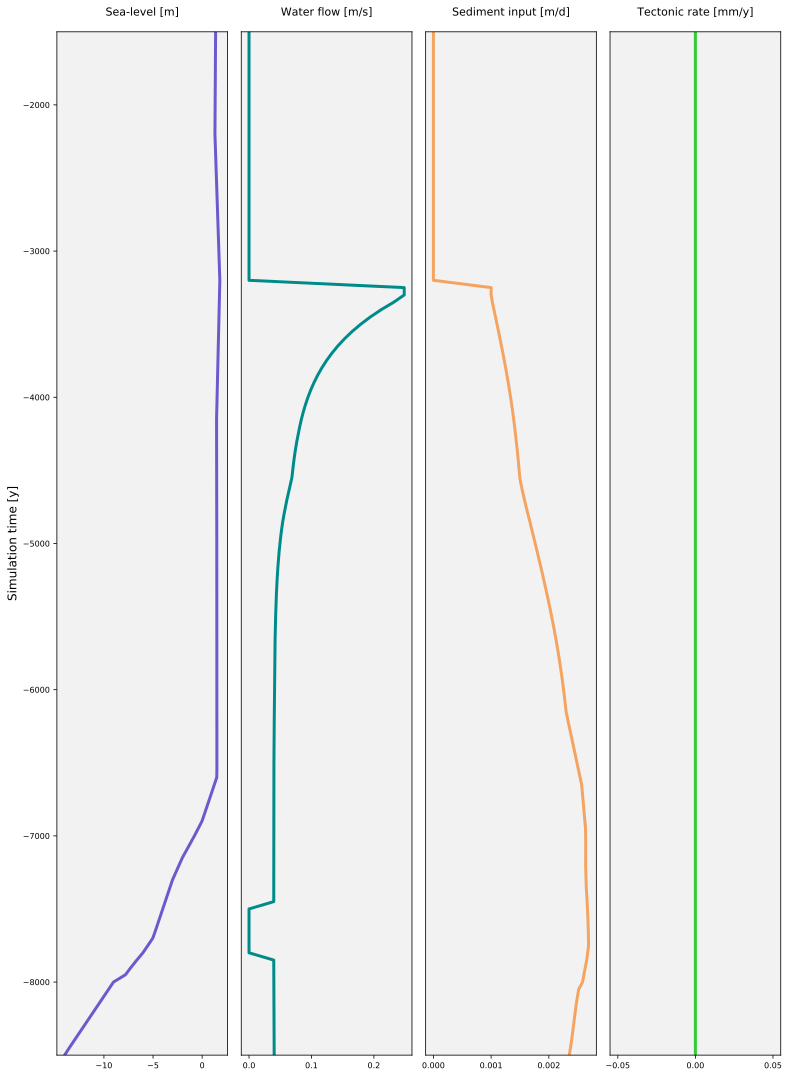

Figure has been saved in envioutput-ex6_2/envicore.pdf



In [8]:
reef.plot.drawCore(lwidth = 3, colsed=colors, tstep=20, coltime = colors2, size=(11,15), font=8, dpi=500, 
                   figname='core.pdf')

## <a name="analyse"></a>  Analysing model results

Figure below presents the GBR-representative assemblages summarised by Dechnik (2016) as well as the simulated core by pyReef-Core. The modelled core is 35 m long and is composed of three assemblages characteristic of an exposed margin and carbonate sediments. 

The simulation portrays two distinct assemblage transitions from massive assemblages representing deep (20-30 m), low-flow conditions to a faster-growing, tabular-and-branching assemblage characteristic of the 6-20 m depth interval, which
is succeeded in shallow water ( < 6 m) by a robust-branching assemblage representing higher-energy conditions.

<div align="center">
    <img width=900 src="https://rawgit.com/pyReef-model/pyReefCore/master/mfigs/fig6.jpg" alt="Idealised case shallowing-up fossil reef sequence" title="Idealised case shallowing-up fossil reef sequence"</img>
</div>

As sea-level rises from 8.5 to 6.5 ka, the deeper assemblages have sufficient accommodation space (>20 m) and low-flow to thrive. However, greater sediment input at depth is inhibitive in the early part of the simulation at the base of the core (32-35 m). As sea-level begins to stabilise (top right panel Fig. above), accommodation space decreases and moderate-deep assemblages start to dominate the sequence up to 4.7 ka (bottom left panel). 

<br/>
<br/>
<div align="center">
    <img width=850 src="https://rawgit.com/pyReef-model/pyReefCore/master/mfigs/fig5.jpg" alt="communities changes & core characteristics"</img>
</div>
<br/>


Following stabilisation from 4.7 to 3.2 ka, shallow assemblages develop as a result of the decreased accommodation space ($\sim$6 m at 4.7 ka), high-velocity hydrodynamic conditions and reduced sediment input. Assemblage growth rates (bottom right panel) show a pattern similar to the population number curves with values lower than assemblage maximum production rates (Table 2) indicative of the effects of environmental factors (sediment input and flow velocity) on the growth of each assemblage. 

The deeper assemblage is 15 m thick and is composed of 30-60 % carbonate sediment and is succeeded by $\sim$12 m of moderate-deep assemblages with a lesser proportion of sediment. The last 6-7 m of core are predominantly formed by shallow assemblages with on average less than 20% of carbonate sediments. The simulated shallowing-up sequence accurately reflects expected shift from 20 deep to moderately-deep assemblages at $\sim$15-20 m depth, and from moderately-deep to shallow assemblages at $\sim$6 m depth proposed by Cabioch et al. (1999) and Dechnik (2016). 

The simulated sequence relates well with the description proposed by Dechnik (2016) and reproduces the distinct assemblages defined in the idealised reef sequences found on exposed margin along the GBR.

***

The modelled core reaches sea-level at around 2.5 ka (Fig. 6 which also correlates well with values reported for several reefs in the GBR (Davies and Hopley, 1983; Dechnik et al., 2015). Average vertical accretion rate implied by the model is around 4.1 m/kyr, again in the range of actual drill cores average rates which varies around 3 to 5 m/ka on exposed reef margins (Davies and Hopley, 1983; Camoin et al., 2012; Dechnik et al., 2015). 

It is also worth noting that coral growth becomes predominant within the sequence at ∼7.8 ka in the modelled core which coheres with the observed delay in reef initiation of approximately 1 ka (Dechnik et al., 2015) after initial flooding of the substrate during the Holocene transgression. We also notice that the transitions between assemblages also correspond to periods where the proportion of carbonate sediment
 deposited increases. It mimics a lag between optimal conditions from one assemblage to the other and relates to the choice of environmental threshold functions that were imposed in our simulation. 
 
Overall, the model reproduces the details of the formation of shallowing-upward sequences both in terms of assemblages succession, accretion rates, deposited thicknesses and timing of initiation. It can be applied to estimate the impact of changing environmental conditions on growth rates and patterns under many different settings and initial conditions.